In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-mauedy1h because the default path (/home/jupyter-ikharitonov/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [3]:
cache = EcephysProjectCache.from_warehouse(manifest = Path.home() / 'RANCZLAB-NAS' / 'allensdk_ecephys_data' / 'manifest.json')
# cache = EcephysProjectCache.from_warehouse(manifest = Path.home() / 'disk2' / 'ecephys_data' / 'manifest.json')

In [4]:
session_id = 715093703
session = cache.get_session_data(session_id)

In [5]:
probe_id = 810755797

In [6]:
session.probes

,description,location,sampling_rate,lfp_sampling_rate,has_lfp_data
id,,,,,
810755797,probeA,See electrode locations,29999.954846,1249.998119,True
810755799,probeB,See electrode locations,29999.906318,1249.996097,True
810755801,probeC,See electrode locations,29999.985470,1249.999395,True
810755803,probeD,See electrode locations,29999.908100,1249.996171,True
810755805,probeE,See electrode locations,29999.985679,1249.999403,True
810755807,probeF,See electrode locations,30000.028033,1250.001168,True


In [7]:
session.units[session.units.probe_id==probe_id].ecephys_structure_acronym.unique()

array(['APN', 'DG', 'CA1', 'VISam'], dtype=object)

In [28]:
session.units[session.units.probe_id==810755799].ecephys_structure_acronym.unique()

array(['grey', 'VISpm'], dtype=object)

In [8]:
recorded_unit_ids = session.units[session.units.probe_id==probe_id].index.to_list()

spike_times = {uid: list(session.spike_times[uid]) for uid in recorded_unit_ids}
spike_times = list(spike_times.values())

/opt/tljh/user/envs/jh_allendata/lib/python3.7/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:1371: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could "


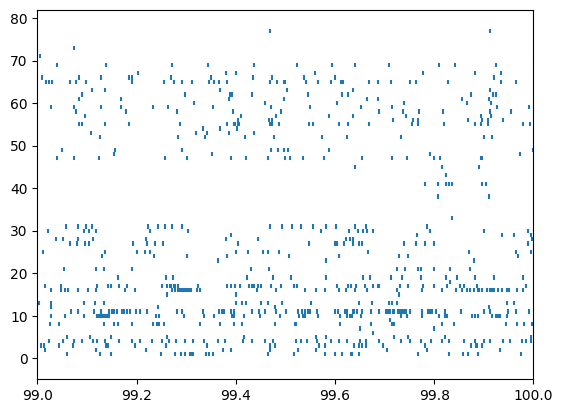

In [9]:
plt.eventplot(spike_times)
plt.xlim([99,100])
plt.show()

In [10]:
session.units[session.units.probe_id==probe_id]

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950910352,0.476196,106.785900,0.057700,6,419.57,4.576155,4.532385,0.029797,69.455405,0.002020,...,215.0,APN,8157.0,3521.0,6697.0,probeA,See electrode locations,29999.954846,1249.998119,True
950910364,0.953652,85.808775,0.065649,7,231.42,5.602703,31.486161,0.005998,102.847616,0.000146,...,215.0,APN,8154.0,3513.0,6698.0,probeA,See electrode locations,29999.954846,1249.998119,True
950910371,0.615593,76.898055,0.015509,8,209.31,5.061817,17.328610,0.005242,76.907610,0.004522,...,215.0,APN,8146.0,3487.0,6701.0,probeA,See electrode locations,29999.954846,1249.998119,True
950910392,0.616317,120.519555,0.025891,11,179.71,4.219074,16.262414,0.096884,65.671206,0.007306,...,215.0,APN,8133.0,3444.0,6707.0,probeA,See electrode locations,29999.954846,1249.998119,True
950910435,0.174735,66.974895,0.010061,17,99.99,6.393051,62.326305,0.004243,294.002222,0.000136,...,215.0,APN,8110.0,3367.0,6719.0,probeA,See electrode locations,29999.954846,1249.998119,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950912511,0.988755,72.080775,0.004692,250,292.35,4.216081,0.941029,0.148122,62.744330,0.007300,...,394.0,VISam,7336.0,699.0,7643.0,probeA,See electrode locations,29999.954846,1249.998119,True
950913000,0.281950,65.029380,0.003564,294,189.90,5.545237,2.502412,0.020946,114.425666,0.001202,...,394.0,VISam,7327.0,660.0,7646.0,probeA,See electrode locations,29999.954846,1249.998119,True
950913031,0.054026,118.442610,0.012989,297,47.92,5.404007,0.145348,0.000000,53.204277,0.001691,...,394.0,VISam,7323.0,641.0,7647.0,probeA,See electrode locations,29999.954846,1249.998119,True


In [11]:
waveforms = {uid: session.mean_waveforms[uid] for uid in recorded_unit_ids}
# contains waveforms across all recorded channels and 82 time samples

In [12]:
list(waveforms.values())[2]

<xarray.DataArray (channel_id: 374, time: 82)>
array([[ 0.      ,  0.30225 , -1.124175, ..., -1.454895, -1.23513 ,
         0.878865],
       [ 0.      , -0.161265, -0.44421 , ...,  0.19344 , -0.089505,
        -0.25545 ],
       [ 0.      , -0.132015, -0.41067 , ...,  0.19812 ,  0.28197 ,
         0.32487 ],
       ...,
       [ 0.      , -0.460395, -0.010335, ...,  0.12207 ,  0.06045 ,
         0.095355],
       [ 0.      , -0.332475,  0.047385, ..., -0.528255, -0.036075,
        -0.19617 ],
       [ 0.      , -0.32175 , -0.238485, ..., -0.44421 ,  0.04446 ,
        -0.479505]])
Coordinates:
  * channel_id  (channel_id) int64 850264146 850264148 ... 850264910 850264912
  * time        (time) float64 0.0 3.333e-05 6.667e-05 ... 0.002667 0.0027

In [13]:
waveforms[950910352].sel(channel_id=850264156).data.shape

(82,)

In [14]:
peak_channels = {uid: session.units.loc[uid, 'peak_channel_id'] for uid in recorded_unit_ids}

In [15]:
waveforms_to_plot = []
for uid in waveforms.keys():
    waveforms_to_plot.append(waveforms[uid].sel(channel_id=peak_channels[uid]))

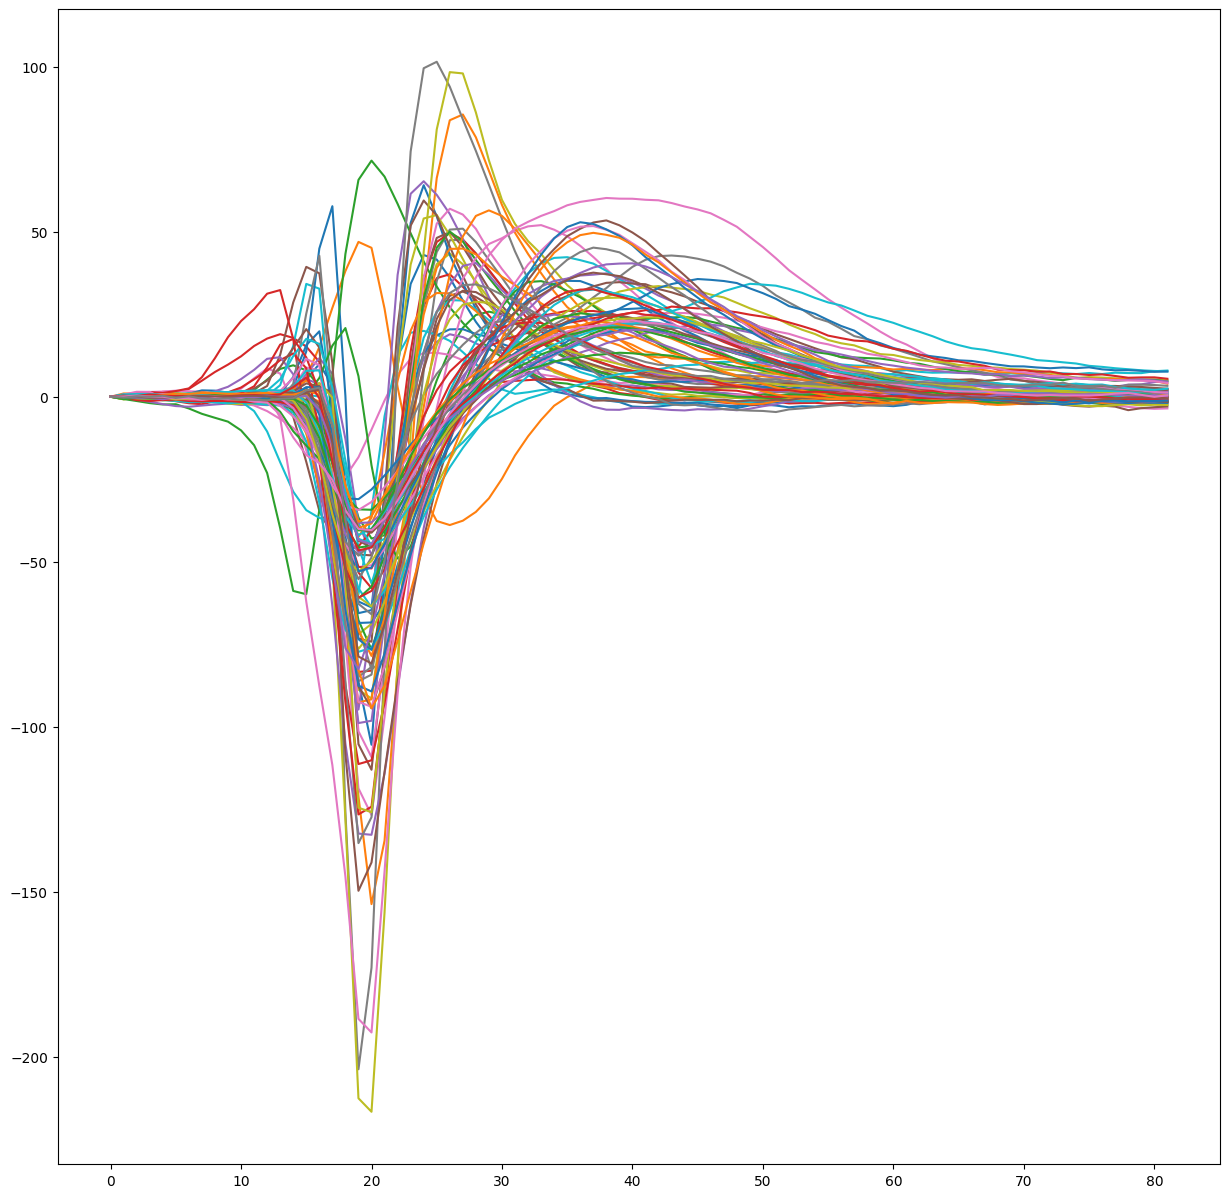

In [16]:
plt.figure(figsize=(15,15))
for waveform in waveforms_to_plot: plt.plot(waveform)
plt.show()

In [17]:
session.channels[session.channels.probe_id==probe_id].shape

(374, 11)

In [18]:
# checking how many channels there are - which version of neuropixels is used?

In [19]:
import os
l = os.listdir(Path.home()/'RANCZLAB-NAS/allensdk_ecephys_data')

l.remove('sessions.csv')
l.remove('units.csv')
l.remove('probes.csv')
l.remove('channels.csv')
l.remove('manifest.json')
sids = [int(x.split('_')[1]) for x in l]

In [35]:
for sid in sids: 
    temp_session = cache.get_session_data(sid)
    # temp_probe_id = temp_session.probes.index[0]
    for temp_probe_id in temp_session.probes.index:
        channels_on_probe = temp_session.channels[temp_session.channels.probe_id==temp_probe_id].shape[0]
        areas_on_probe = list(temp_session.units[temp_session.units.probe_id==temp_probe_id].ecephys_structure_acronym.unique())
        print(f'SID {sid} PID {temp_probe_id} CHAN {channels_on_probe} AREAS {areas_on_probe}')

SID 771160300 PID 773621937 CHAN 373 AREAS ['PPT', 'NOT', 'SUB', 'ProS', 'CA1', 'VISam']
SID 771160300 PID 773621939 CHAN 368 AREAS ['APN', 'CA1', 'VISpm']
SID 771160300 PID 773621942 CHAN 372 AREAS ['LP', 'DG', 'CA1', 'VISp']
SID 771160300 PID 773621945 CHAN 372 AREAS ['CA3', 'CA1', 'VISli']
SID 771160300 PID 773621948 CHAN 374 AREAS ['ZI', 'IntG', 'IGL', 'LGd', 'CA3', 'DG', 'CA1', 'VISal']
SID 771160300 PID 773621950 CHAN 371 AREAS ['PPT', 'OP', 'NOT', 'CA1', 'VIS']
SID 760345702 PID 810753195 CHAN 374 AREAS ['DG', 'CA1', 'VISam']
SID 760345702 PID 810753197 CHAN 370 AREAS ['LP', 'DG', 'CA1', 'VISpm']
SID 760345702 PID 810753199 CHAN 373 AREAS ['LGd', 'DG', 'CA1', 'VISp']
SID 760345702 PID 810753201 CHAN 374 AREAS ['CA3', 'CA2', 'CA1', 'VISl']
SID 760345702 PID 810753203 CHAN 371 AREAS ['MB', 'TH', 'PP', 'PIL', 'CA3', 'DG', 'CA1', 'VISal']
SID 797828357 PID 805579734 CHAN 374 AREAS ['PPT', 'APN', 'CA1', 'VISam']
SID 797828357 PID 805579738 CHAN 368 AREAS ['APN', 'CA1', 'VISpm']
SID 7

In [21]:
session.channels

,filtering,probe_channel_number,probe_horizontal_position,probe_id,probe_vertical_position,structure_acronym,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate
id,,,,,,,,,,,
850261194,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,0,43,810755801,20,PO,1020.0,PO,7648.0,3645.0,7567.0
850261196,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,1,11,810755801,20,PO,1020.0,PO,7651.0,3636.0,7566.0
850261202,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,4,43,810755801,60,PO,1020.0,PO,7660.0,3610.0,7564.0
850261206,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,6,59,810755801,80,PO,1020.0,PO,7665.0,3592.0,7562.0
850261212,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,9,11,810755801,100,PO,1020.0,PO,7674.0,3566.0,7560.0
...,...,...,...,...,...,...,...,...,...,...,...
850264894,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,374,59,810755797,3760,None,NaN,NaN,7112.0,-53.0,7809.0
850264898,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,376,43,810755797,3780,None,NaN,NaN,7107.0,-69.0,7813.0
850264902,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,378,59,810755797,3800,None,NaN,NaN,7102.0,-85.0,7818.0
